In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Algorithmes
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# Outils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score

In [9]:
# Config Graphique
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

In [10]:
# Fonction utilitaire pour afficher une jolie Matrice de Confusion
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['À Risque (0)', 'Moyen (1)', 'Bon (2)']
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Matrice de Confusion - {model_name}", fontsize=14, fontweight='bold')
    plt.ylabel('Vraie Catégorie')
    plt.xlabel('Catégorie Prédite')
    plt.show()

print("Environnement prêt.")

Environnement prêt.


In [11]:
df = pd.read_csv("../data/processed/student_data_cleaned.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_category
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,1
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,2
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,1


In [12]:
# Séparation Features / Target
X = df.drop(['G3', 'grade_category'], axis=1)
y_class = df['grade_category']  # 0, 1, 2
y_reg = df['G3']                # Note /20

In [13]:
# Split (80% Train, 20% Test) - Random State fixe pour reproductibilité
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

In [15]:
# Liste pour stocker les résultats finaux
final_results = []

print(f"Données prêtes : {X_train.shape[0]} exemples d'entraînement, {X_test.shape[0]} de test.")

Données prêtes : 519 exemples d'entraînement, 130 de test.


In [16]:
MODEL_NAME = "Random Forest"
print(f"🔄 Entraînement de {MODEL_NAME}...")

# 1. Entraînement
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
clf_rf.fit(X_train, y_class_train)
train_time = time.time() - start_time

# 2. Prédiction
y_pred_rf = clf_rf.predict(X_test)

🔄 Entraînement de Random Forest...


In [17]:
# 3. Métriques
acc_rf = accuracy_score(y_class_test, y_pred_rf)
print(f"✅ Accuracy : {acc_rf:.2%}")
print("\nRapport de Classification :")
print(classification_report(y_class_test, y_pred_rf, target_names=['Risque', 'Moyen', 'Bon']))

✅ Accuracy : 86.15%

Rapport de Classification :
              precision    recall  f1-score   support

      Risque       0.75      0.60      0.67        15
       Moyen       0.83      0.94      0.88        71
         Bon       0.97      0.82      0.89        44

    accuracy                           0.86       130
   macro avg       0.85      0.79      0.81       130
weighted avg       0.87      0.86      0.86       130



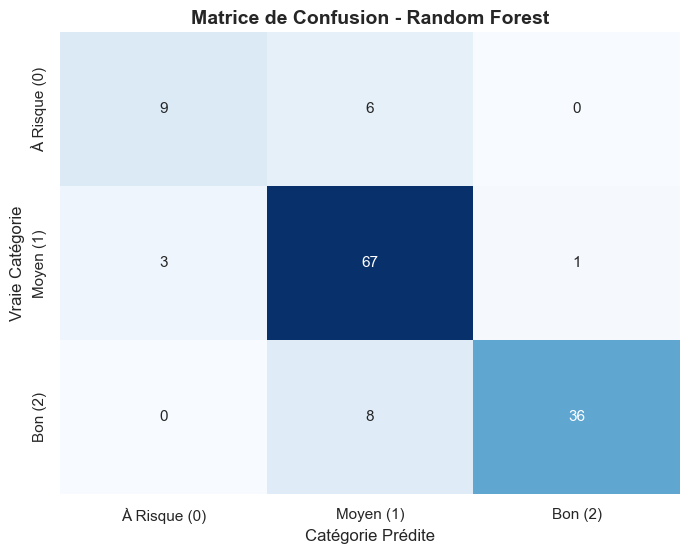

In [19]:
# 4. Stockage pour comparaison
final_results.append({'Modèle': MODEL_NAME, 'Accuracy': acc_rf, 'Temps': train_time})

# 5. Visualisation
plot_confusion_matrix(y_class_test, y_pred_rf, MODEL_NAME)

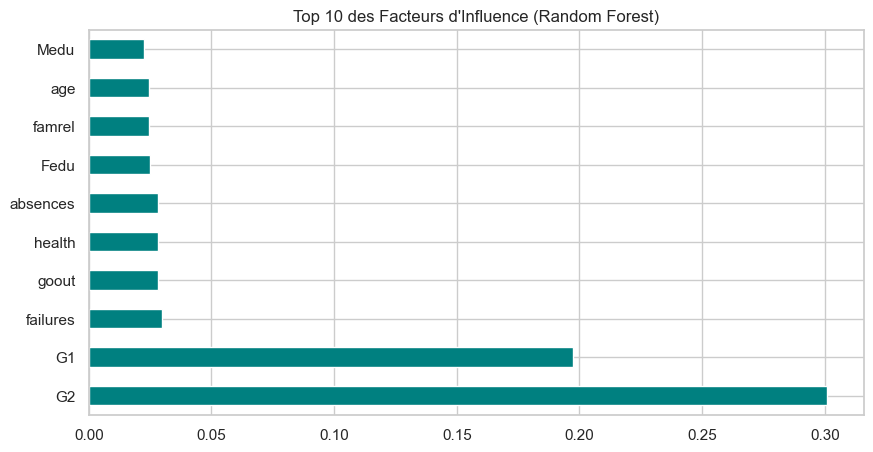

In [21]:
# Feature Importance 
plt.figure(figsize=(10, 5))
feat_importances = pd.Series(clf_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 des Facteurs d'Influence (Random Forest)")
plt.show()

In [24]:
MODEL_NAME = "SVM (Linear)"
print(f"🔄 Entraînement de {MODEL_NAME}...")

# 1. Entraînement
clf_svm = SVC(kernel='linear', random_state=42)
start_time = time.time()
clf_svm.fit(X_train, y_class_train)
train_time = time.time() - start_time

# 2. Prédiction
y_pred_svm = clf_svm.predict(X_test)


🔄 Entraînement de SVM (Linear)...


In [23]:
# 3. Métriques
acc_svm = accuracy_score(y_class_test, y_pred_svm)
print(f"✅ Accuracy : {acc_svm:.2%}")
print("\nRapport de Classification :")
print(classification_report(y_class_test, y_pred_svm, target_names=['Risque', 'Moyen', 'Bon']))

✅ Accuracy : 84.62%

Rapport de Classification :
              precision    recall  f1-score   support

      Risque       0.62      0.67      0.65        15
       Moyen       0.86      0.86      0.86        71
         Bon       0.91      0.89      0.90        44

    accuracy                           0.85       130
   macro avg       0.80      0.80      0.80       130
weighted avg       0.85      0.85      0.85       130



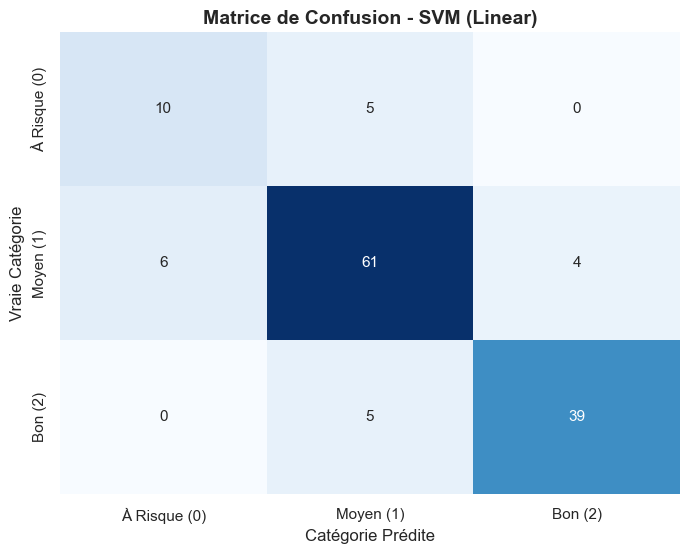

In [25]:
# 4. Stockage
final_results.append({'Modèle': MODEL_NAME, 'Accuracy': acc_svm, 'Temps': train_time})

# 5. Visualisation
plot_confusion_matrix(y_class_test, y_pred_svm, MODEL_NAME)

In [26]:
MODEL_NAME = "KNN (k=5)"
print(f"🔄 Entraînement de {MODEL_NAME}...")

# 1. Entraînement
clf_knn = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
clf_knn.fit(X_train, y_class_train)
train_time = time.time() - start_time

# 2. Prédiction
y_pred_knn = clf_knn.predict(X_test)

🔄 Entraînement de KNN (k=5)...


In [27]:
# 3. Métriques
acc_knn = accuracy_score(y_class_test, y_pred_knn)
print(f"✅ Accuracy : {acc_knn:.2%}")
print("\nRapport de Classification :")
print(classification_report(y_class_test, y_pred_knn, target_names=['Risque', 'Moyen', 'Bon']))


✅ Accuracy : 83.08%

Rapport de Classification :
              precision    recall  f1-score   support

      Risque       0.67      0.53      0.59        15
       Moyen       0.82      0.90      0.86        71
         Bon       0.90      0.82      0.86        44

    accuracy                           0.83       130
   macro avg       0.80      0.75      0.77       130
weighted avg       0.83      0.83      0.83       130



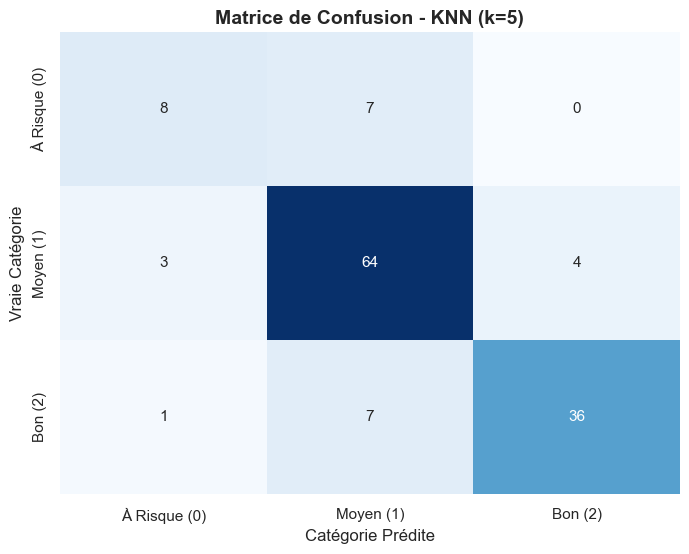

In [28]:
# 4. Stockage
final_results.append({'Modèle': MODEL_NAME, 'Accuracy': acc_knn, 'Temps': train_time})

# 5. Visualisation
plot_confusion_matrix(y_class_test, y_pred_knn, MODEL_NAME)

🔄 Entraînement de Gradient Boosting...
✅ Accuracy : 85.38%


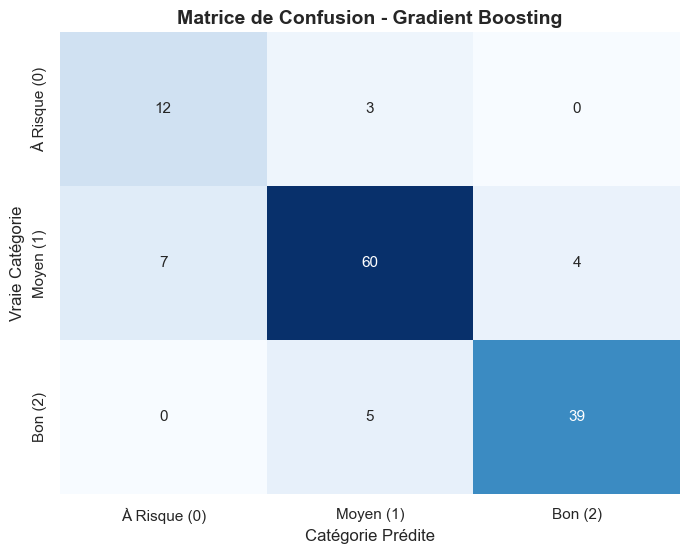

In [29]:
MODEL_NAME = "Gradient Boosting"
print(f"🔄 Entraînement de {MODEL_NAME}...")

clf_gb = GradientBoostingClassifier(random_state=42)
start_time = time.time()
clf_gb.fit(X_train, y_class_train)
train_time = time.time() - start_time

y_pred_gb = clf_gb.predict(X_test)
acc_gb = accuracy_score(y_class_test, y_pred_gb)
print(f"✅ Accuracy : {acc_gb:.2%}")

final_results.append({'Modèle': MODEL_NAME, 'Accuracy': acc_gb, 'Temps': train_time})
plot_confusion_matrix(y_class_test, y_pred_gb, MODEL_NAME)

In [33]:
# Création du DataFrame comparatif
df_res = pd.DataFrame(final_results).sort_values(by='Accuracy', ascending=False)

print("🏆 CLASSEMENT FINAL DES MODÈLES :")
display(df_res.style.background_gradient(cmap='Greens', subset=['Accuracy']))


🏆 CLASSEMENT FINAL DES MODÈLES :


,Modèle,Accuracy,Temps
0,Random Forest,0.861538,0.335267
1,Random Forest,0.861538,0.335267
5,Gradient Boosting,0.853846,0.922882
2,SVM (Linear),0.846154,0.029717
3,SVM (Linear),0.846154,0.028387
4,KNN (k=5),0.830769,0.003604


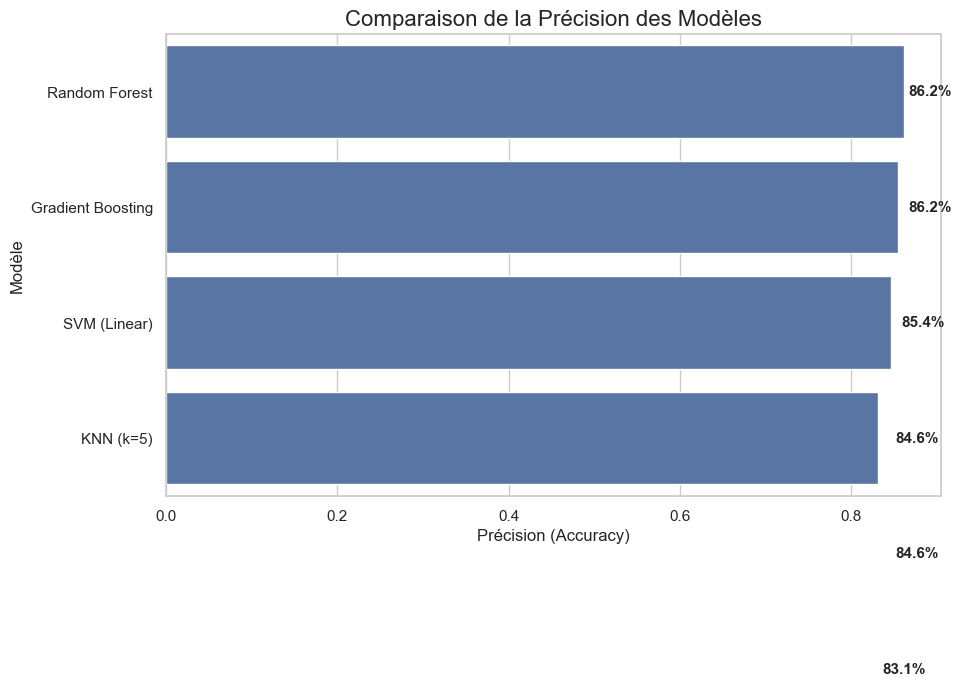

✨ Conclusion : Le modèle recommandé pour l'application est : Random Forest


In [35]:

# Graphique comparatif
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Accuracy', y='Modèle', data=df_res)

# Ajouter les % sur les barres
for i, v in enumerate(df_res['Accuracy']):
    barplot.text(v + 0.005, i, f"{v:.1%}", va='center', fontweight='bold')


plt.title("Comparaison de la Précision des Modèles", fontsize=16)
plt.xlabel("Précision (Accuracy)")
plt.show()

best_model = df_res.iloc[0]['Modèle']
print(f"✨ Conclusion : Le modèle recommandé pour l'application est : {best_model}")

In [37]:
print("⚔️ BATAILLE RÉGRESSION : Linear vs Random Forest")

# 1. Linear Regression
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_reg_train)
pred_lin = reg_lin.predict(X_test)
mae_lin = mean_absolute_error(y_reg_test, pred_lin)

# 2. Random Forest Regressor
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_rf.fit(X_train, y_reg_train)
pred_rf = reg_rf.predict(X_test)
mae_rf = mean_absolute_error(y_reg_test, pred_rf)

⚔️ BATAILLE RÉGRESSION : Linear vs Random Forest


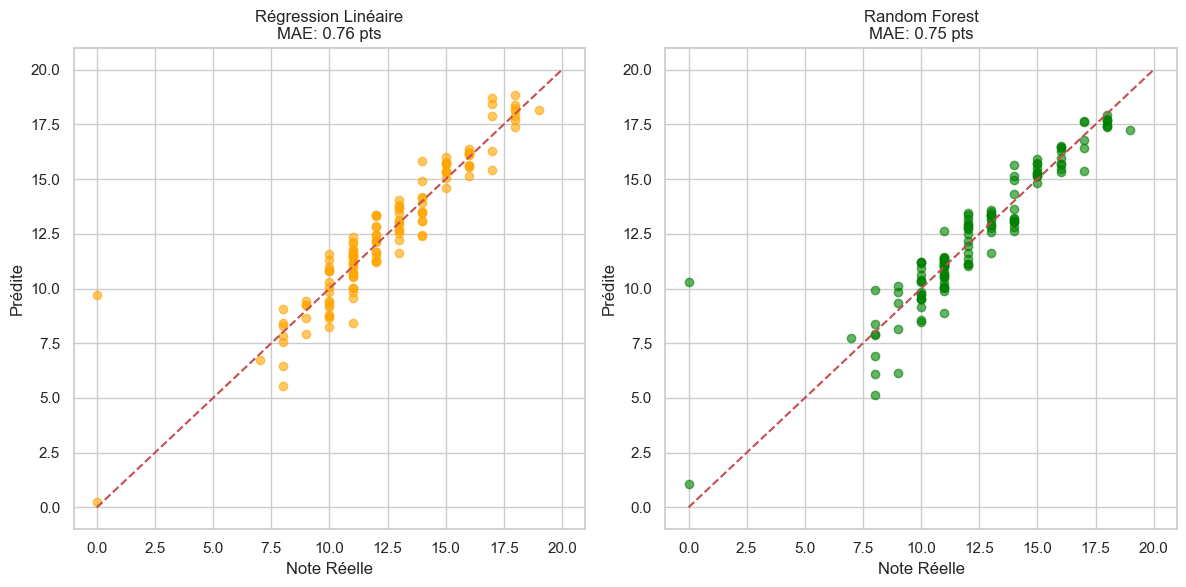

🏆 Le modèle le plus précis est : Random Forest (Erreur moyenne plus faible)


In [38]:

# Comparaison Visuelle
plt.figure(figsize=(12, 6))

# Plot Linear
plt.subplot(1, 2, 1)
plt.scatter(y_reg_test, pred_lin, alpha=0.6, color='orange')
plt.plot([0, 20], [0, 20], 'r--')
plt.title(f"Régression Linéaire\nMAE: {mae_lin:.2f} pts")
plt.xlabel("Note Réelle"); plt.ylabel("Prédite")

# Plot Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_reg_test, pred_rf, alpha=0.6, color='green')
plt.plot([0, 20], [0, 20], 'r--')
plt.title(f"Random Forest\nMAE: {mae_rf:.2f} pts")
plt.xlabel("Note Réelle"); plt.ylabel("Prédite")

plt.tight_layout()
plt.show()

winner = "Random Forest" if mae_rf < mae_lin else "Linear Regression"
print(f"🏆 Le modèle le plus précis est : {winner} (Erreur moyenne plus faible)")